In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save the cleaned DataFrame to a new CSV file
heart = pd.read_csv('../data/cleaned_all_states_Heart_Disease_and_Stroke_Mortality_Among_US_Adults_35.csv')

In [3]:
heart.head()

,Year,State,County,CauseOfDeath,MortalityRate,Data_Value_Unit,ConfLow,ConfHigh,AgeGroup,RaceEthnicity,Gender
0,2016.0,AL,Autauga,All stroke,25.7,"per 100,000",21.3,30.9,Ages 35-64 years,Overall,Overall
1,2017.0,AL,Autauga,All stroke,33.6,"per 100,000",25.4,44.1,Ages 35-64 years,Overall,Men
2,2017.0,AL,Autauga,All heart disease,128.7,"per 100,000",113.1,144.7,Ages 35-64 years,Overall,Overall
3,2016.0,AL,Autauga,All heart disease,128.1,"per 100,000",114.1,145.5,Ages 35-64 years,Overall,Overall
4,2019.0,AL,Autauga,All heart disease,122.6,"per 100,000",106.4,143.4,Ages 35-64 years,Overall,Overall


In [30]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 888300 entries, (np.float64(2016.0), 'Ages 35-64 years') to (np.float64(2019.0), 'Ages 65 years and older')
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            888300 non-null  object 
 1   County           888300 non-null  object 
 2   CauseOfDeath     888300 non-null  object 
 3   MortalityRate    888300 non-null  float64
 4   Data_Value_Unit  888300 non-null  object 
 5   ConfLow          888300 non-null  float64
 6   ConfHigh         888300 non-null  float64
 7   RaceEthnicity    888300 non-null  object 
 8   Gender           888300 non-null  object 
dtypes: float64(3), object(6)
memory usage: 62.7+ MB


# Exploratory Data Analysis

## Mean Mortality Rate Year on Year Basis

- Calculating and visualizing the Mean Mortality Rate over the year.

In [4]:
mean_mortality_by_year = heart.groupby('Year')['MortalityRate'].mean().reset_index()
mean_mortality_by_year

,Year,MortalityRate
0,2014.0,418.242061
1,2015.0,422.396760
2,2016.0,414.954829
3,2017.0,415.286313
4,2018.0,410.242330
5,2019.0,406.414249


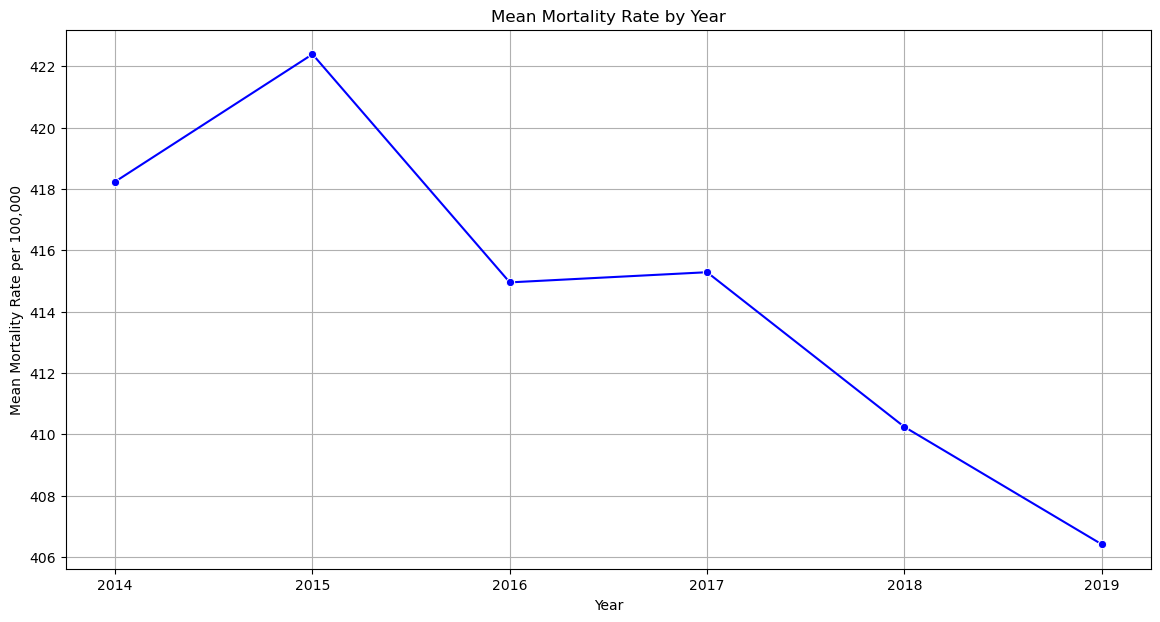

In [5]:
plt.figure(figsize=(14, 7))

line_plot = sns.lineplot(x='Year', y='MortalityRate', data=mean_mortality_by_year, marker='o', linestyle='-', color='blue')
plt.title('Mean Mortality Rate by Year')
plt.xlabel('Year')
plt.ylabel('Mean Mortality Rate per 100,000')
plt.grid(True)

plt.show()

Representation :-

#### - X-axis (Horizontal Axis) - time with years ranging from 2014 to 2019.
- Y-axis (Vertical Axis) - the mean mortality rate per 100,000 individuals.

There is a clear downward trend in the mortality rate over the period. This could suggest improvements in health outcomes, advancements in medical technology, better healthcare policies or factors contributing to a decrease in mortality.

The sharpness of the decline appears to reduce in later years. This could mean that the rate of improvement in mortality rates has decreased in the recent years.

In [6]:
# Summary statistics
display(heart.groupby('CauseOfDeath')['MortalityRate'].describe())

,count,mean,std,min,25%,50%,75%,max
CauseOfDeath,,,,,,,,
All heart disease,177660.0,596.332751,565.110822,12.1,97.5,217.9,1113.300,3993.4
All stroke,177660.0,135.140157,133.065656,0.8,14.5,33.3,260.800,827.3
Cardiovascular disease (CVD),177660.0,787.909114,740.173127,14.3,121.5,271.1,1500.100,3992.7
Coronary heart disease (CHD),177660.0,331.452861,327.531205,2.1,57.5,134.3,585.125,2047.6
Heart failure,177660.0,222.112236,237.778187,0.0,13.7,38.6,446.500,1450.0


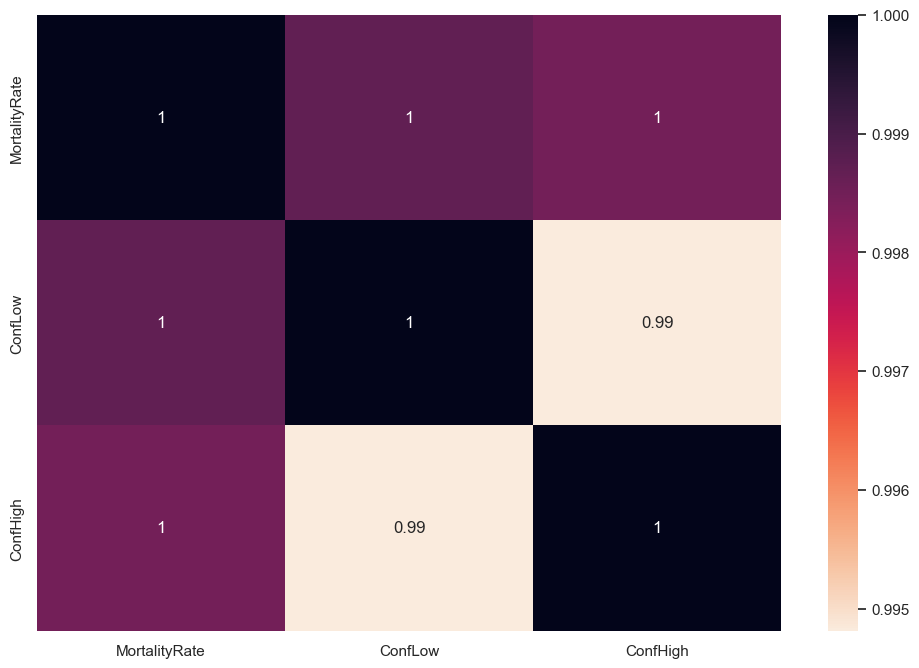

In [31]:
correlations = heart.select_dtypes(include=['number']).corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="rocket_r")
plt.show()

In [ ]:
# Convert categorical columns to numeric using one-hot encoding
heart_encoded = pd.get_dummies(heart, drop_first=True)

# Compute absolute correlations
correlations = heart_encoded.corr().abs()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(correlations, annot=False, cmap="rocket_r")
plt.title("Correlation Heatmap (Including Encoded Categorical Columns)", fontsize=14)
plt.show()

## Average Mortality Rate by Age Group

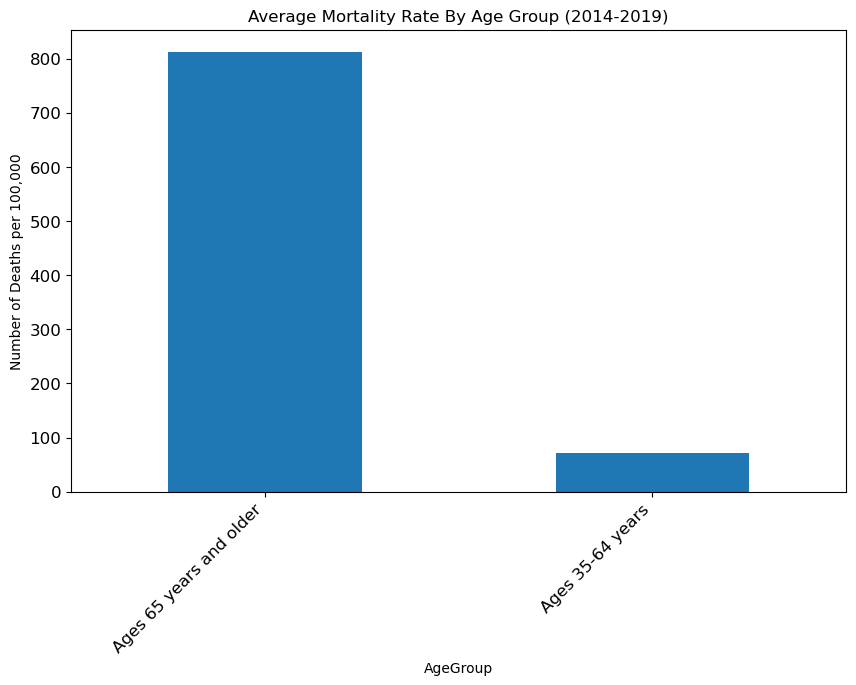

In [7]:
plt.figure(figsize=(10,6))
heart.groupby('AgeGroup')['MortalityRate'].mean().sort_values(ascending=False).plot.bar(fontsize=12).set_title("Average Mortality Rate By Age Group (2014-2019)")
plt.ylabel('Number of Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

The above bar-plot shows the ditribution of mortality rate per 100,000 for two different age groups 35-64 years and 65+ years due to Heart Disease.

From this plot, we can say that :

- The mortality rate is substantially higher in the older age-group(65 years and older) as compared to younger age group (35-64 years).

- This is consistent with general health data trends where mortality rates increase with age due to a higher prevalence of health conditions, decreased immunity, and other age-related factors.

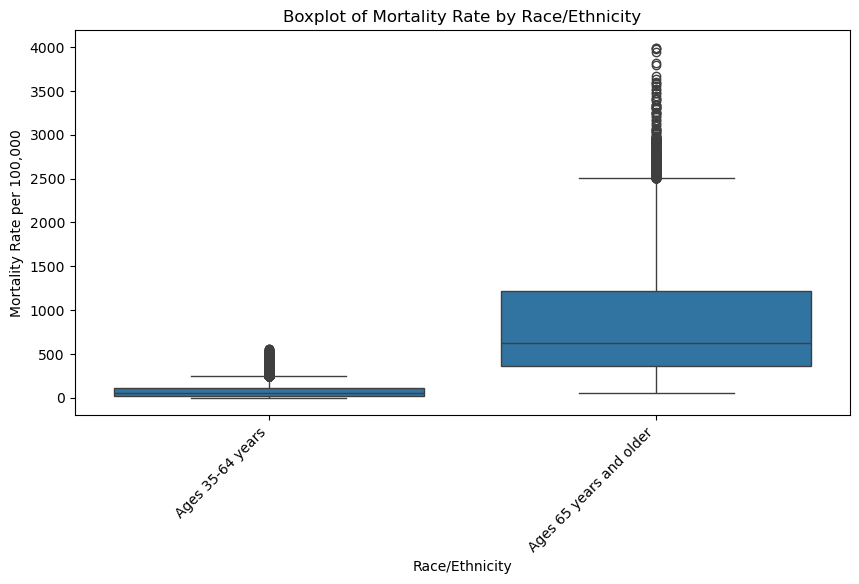

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='AgeGroup', y='MortalityRate', data=heart)
plt.title('Boxplot of Mortality Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mortality Rate per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

## Mortality Rate by Age Group and Sex

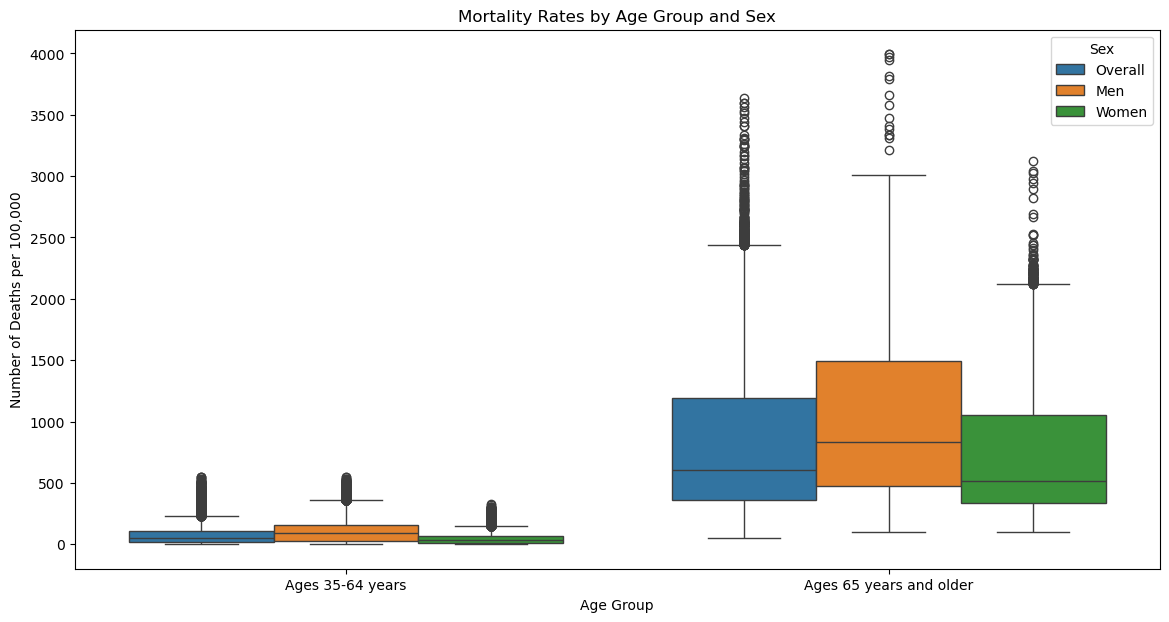

In [9]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=heart, x='AgeGroup', y='MortalityRate', hue='Gender')
plt.title('Mortality Rates by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths per 100,000')
plt.legend(title='Sex')
plt.savefig('Mortality Rates by Age Group and Sex.jpg', format='jpg')
plt.show()

## Mortality Rate by Gender

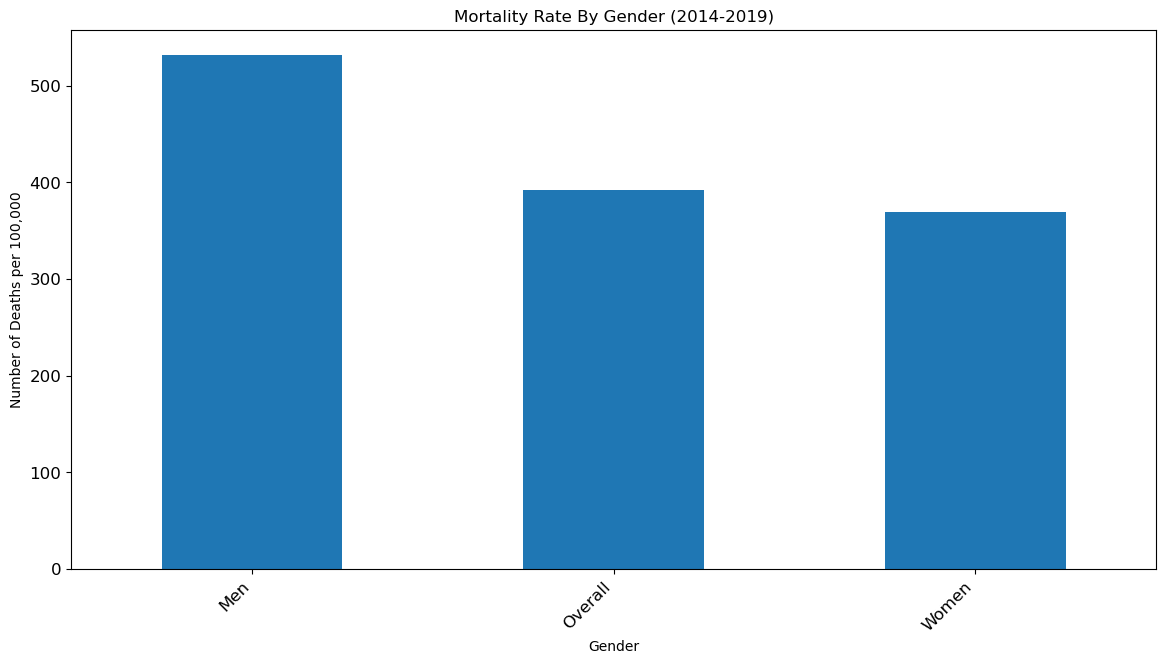

In [10]:
# Plot Average MortalityRate by Gender
plt.figure(figsize=(14,7))
heart.groupby('Gender')['MortalityRate'].mean().sort_values(ascending=False).plot.bar(fontsize=12).set_title("Mortality Rate By Gender (2014-2019)")
plt.ylabel('Number of Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

The above bar plot represents mortality rate per 100,000 individuals between two genders women and men.
- The mortality rate for men is higher than that of women.

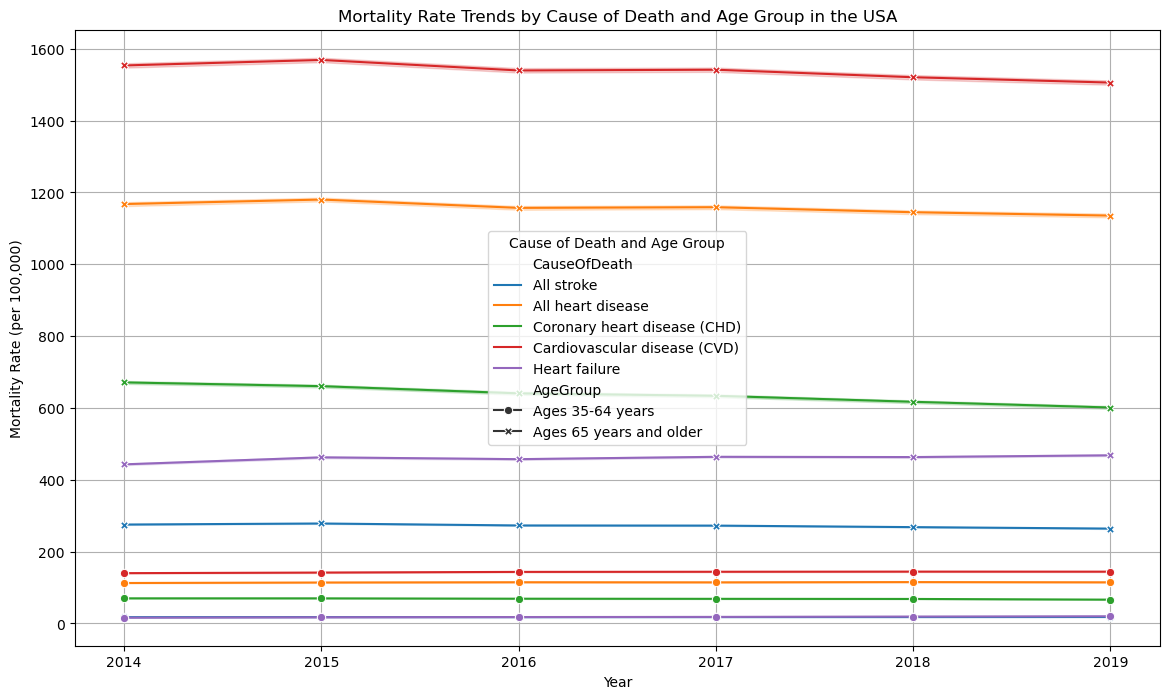

In [11]:
# Set 'Year' and 'AgeGroup' as the index
heart.set_index(['Year', 'AgeGroup'], inplace=True)

# Plot the data

plt.figure(figsize=(14, 8))
sns.lineplot(data=heart, x='Year', y='MortalityRate', hue='CauseOfDeath', style='AgeGroup', markers=True, dashes=False)
plt.title('Mortality Rate Trends by Cause of Death and Age Group in the USA')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000)')
plt.grid(True)
plt.legend(title='Cause of Death and Age Group')
plt.savefig('Mortality Rate Trends by Cause of Death and Age Group in the USA.jpg', format='jpg')
plt.show()

- The mortality rate is substantially higher in the older age-group(65 years and older) as compared to younger age group (35-64 years).

## Mortality Rate by Race and Ethnicity

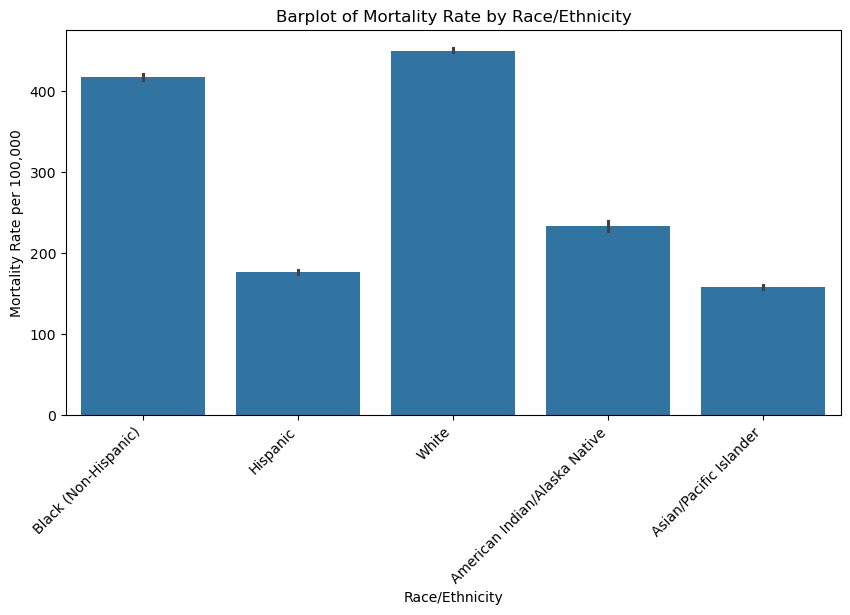

In [12]:
plt.figure(figsize=(10,5))
filtered_data = heart[heart['RaceEthnicity'] != 'Overall']
sns.barplot(x='RaceEthnicity', y='MortalityRate', data=filtered_data)

plt.title('Barplot of Mortality Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mortality Rate per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

The above bar-plot represents the mortality accross the different race and ethnicity.

- The 'White' group have the highest mortality over the period due to heart diseases.
- The 'American Indian/Alaska Native' group have the lowest mortality rate.
- The mortality rates for the 'Asian/Pacific Islander' group are closer to the Hispanic group but lower than the 'Black (Non-Hispanic)' and 'White' groups.

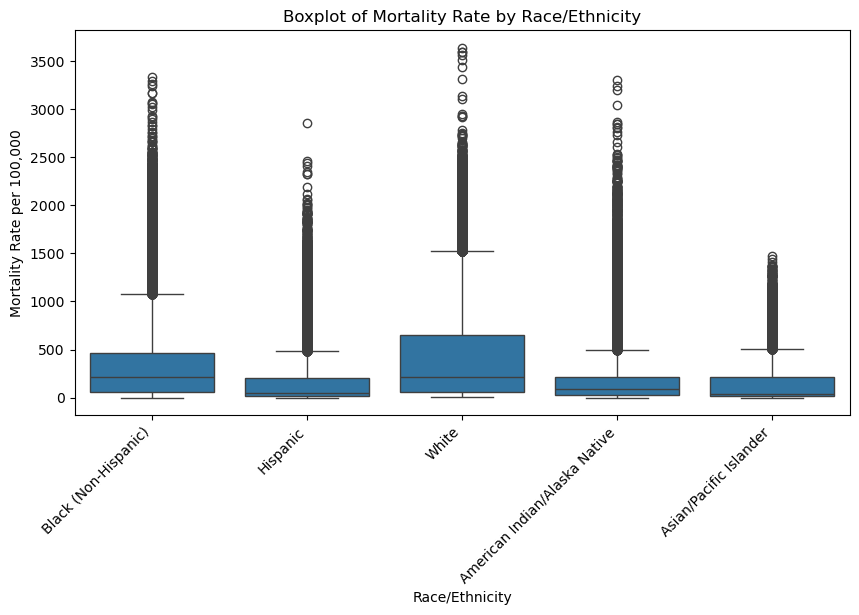

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='RaceEthnicity', y='MortalityRate', data=filtered_data)
plt.title('Boxplot of Mortality Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mortality Rate per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

The box plot illustrates differences and variablitiy in mortality rates among different racial/ethic groups.

- The 'Black (Non Hispanic)' group stand out with the highest median and more significant outliers.
- There are outliers accross all the groups which suggests that there are speific conditions that experience higher mortality rate.

## Mortality Rate by the Cause of Deaths in different years.

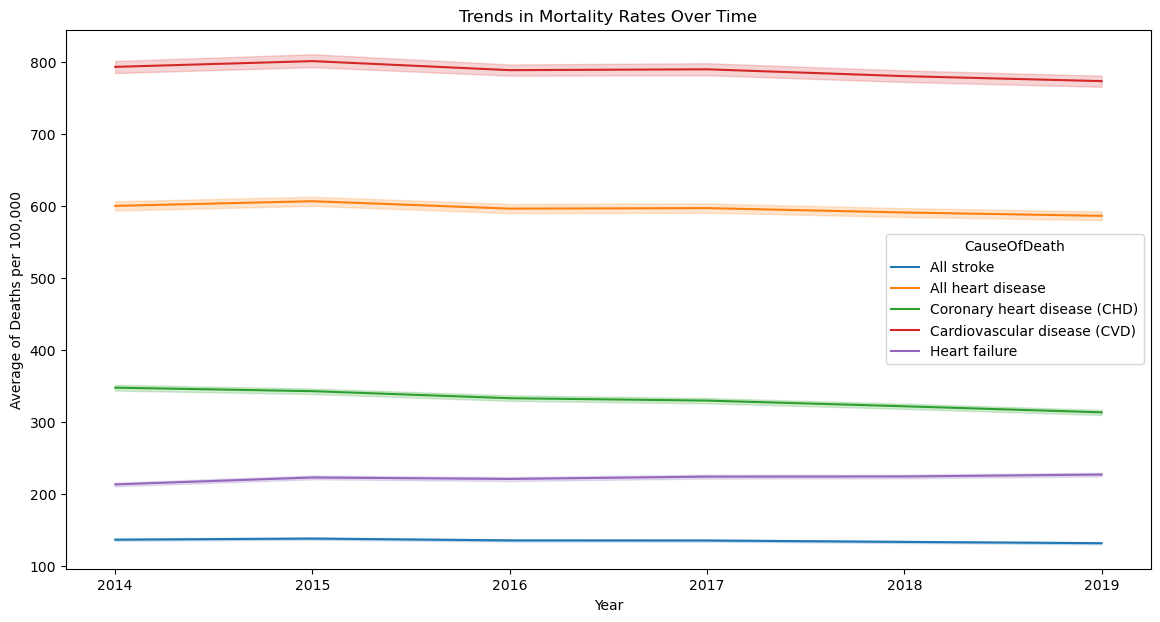

In [14]:
#@title Your Title Here Trends Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=heart, x='Year', y='MortalityRate', hue='CauseOfDeath')
plt.title('Trends in Mortality Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Average of Deaths per 100,000')
plt.savefig('Trends in Mortality Rates Over Time.jpg', format='jpg')
plt.show()

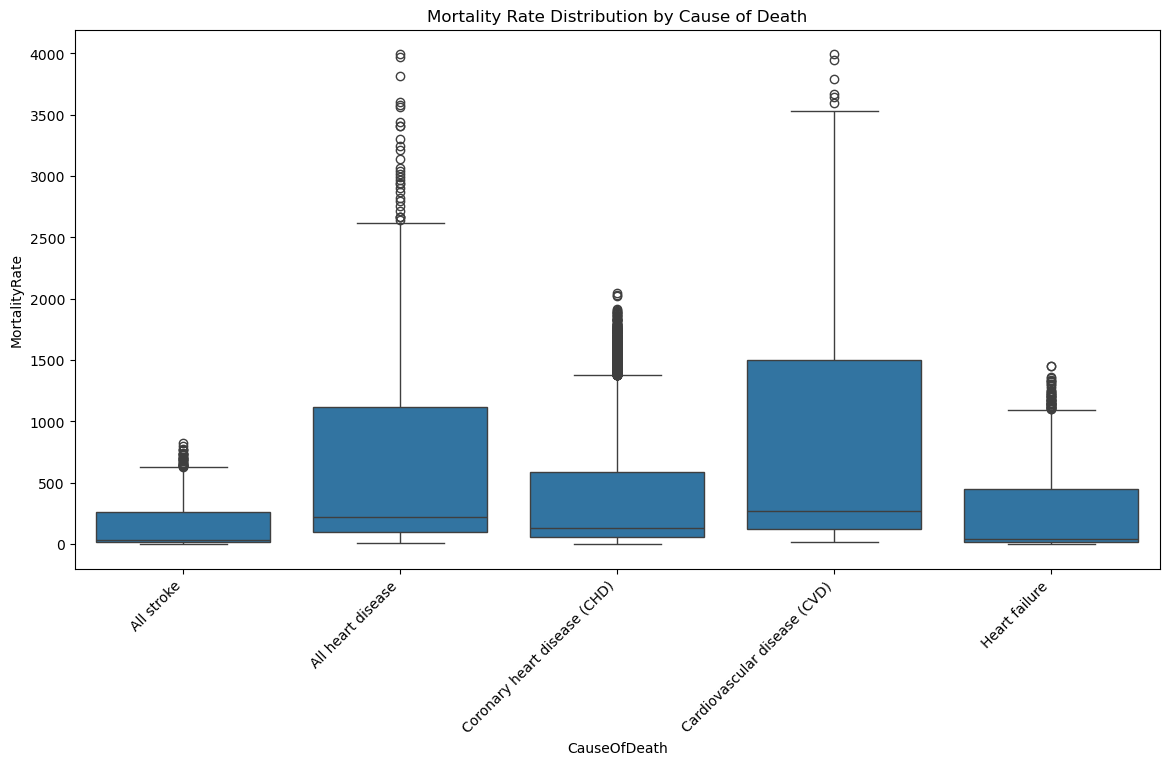

In [15]:
#@title Boxplot by Cause of Death
plt.figure(figsize=(14, 7))
sns.boxplot(data=heart, x='CauseOfDeath', y='MortalityRate')
plt.title('Mortality Rate Distribution by Cause of Death')
plt.xticks(rotation=45, ha='right')
plt.savefig('Mortality Rate Distribution by Cause of Death.jpg', format='jpg')
plt.show()

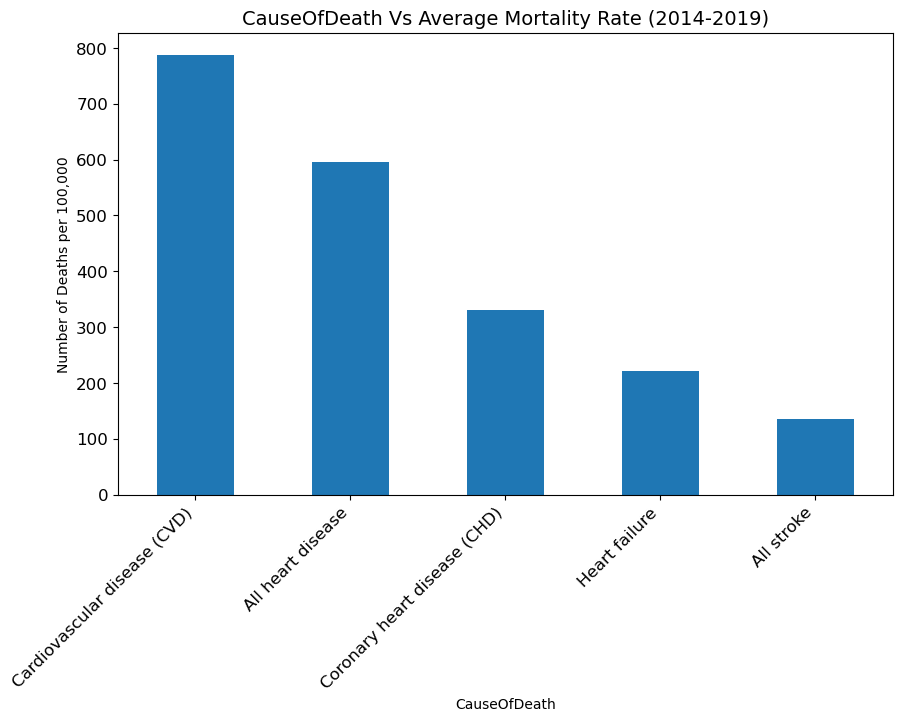

In [16]:
# Plot: Average MortalityRate by CauseOfDeath
plt.figure(figsize=(10,6))
heart.groupby('CauseOfDeath')['MortalityRate'].mean().sort_values(ascending=False).plot.bar(fontsize=12).\
set_title("CauseOfDeath Vs Average Mortality Rate (2014-2019)", fontsize=14)
plt.ylabel('Number of Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

## Mortality Rates by Gender and Cause of Death

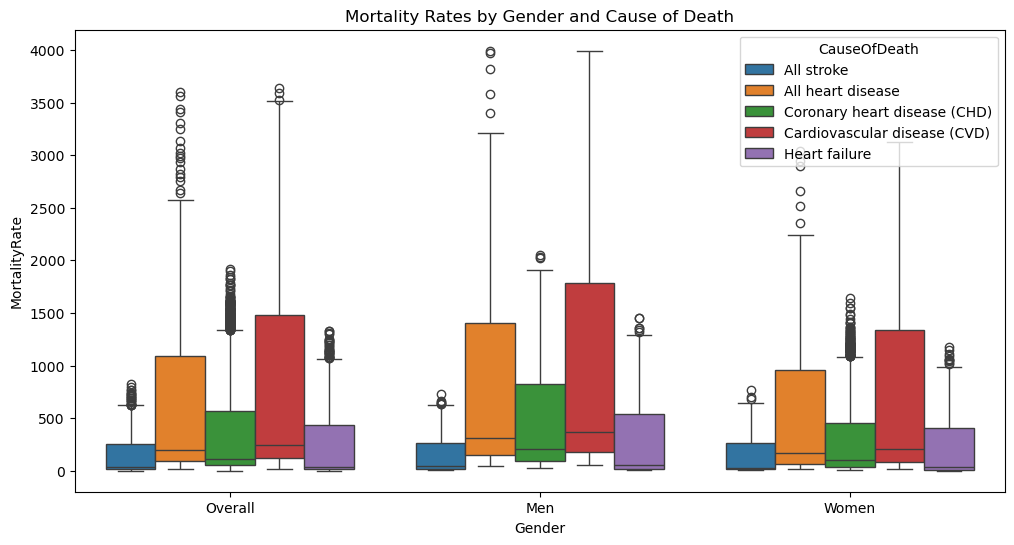

In [17]:
#@title Mortality Rates by Sex and Cause of Death
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=heart, x='Gender', y='MortalityRate', hue='CauseOfDeath')
plt.title('Mortality Rates by Gender and Cause of Death')
plt.savefig('Mortality Rates by Gender and Cause of Death.jpg', format='jpg')
plt.show()

## Mortality Rate by Ethnicity and  Cause of Death

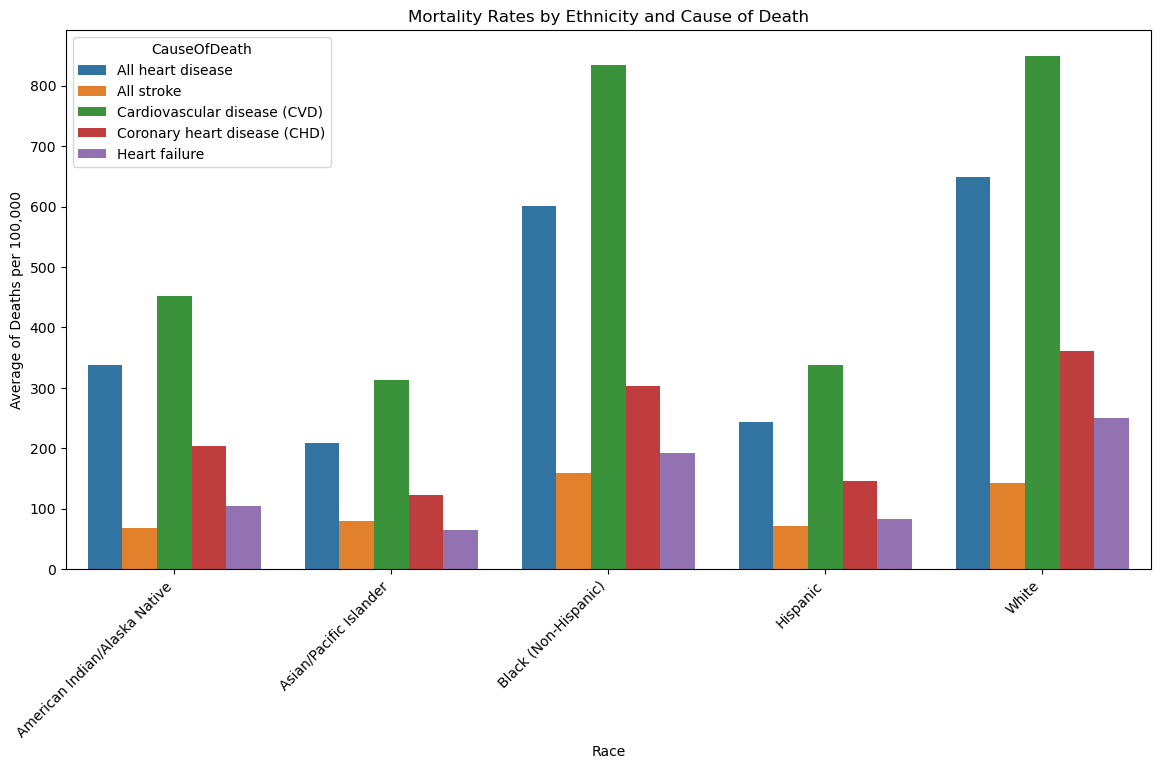

In [18]:
#Average Mortality Rates by Ethnicity and Cause of Death
yearly_avg = filtered_data.groupby(['RaceEthnicity', 'CauseOfDeath'])['MortalityRate'].mean().reset_index()
# Plotting 
plt.figure(figsize=(14, 7))
sns.barplot(data=yearly_avg, x='RaceEthnicity', y='MortalityRate', hue='CauseOfDeath') #, palette=custom_palette, hue_order=hue_order)
plt.title('Mortality Rates by Ethnicity and Cause of Death')
plt.xlabel('Race')
plt.ylabel('Average of Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.savefig('Mortality Rates by Ethnicity and Cause of Death', format='jpg')
plt.show()

## Average Mortality Rate by State

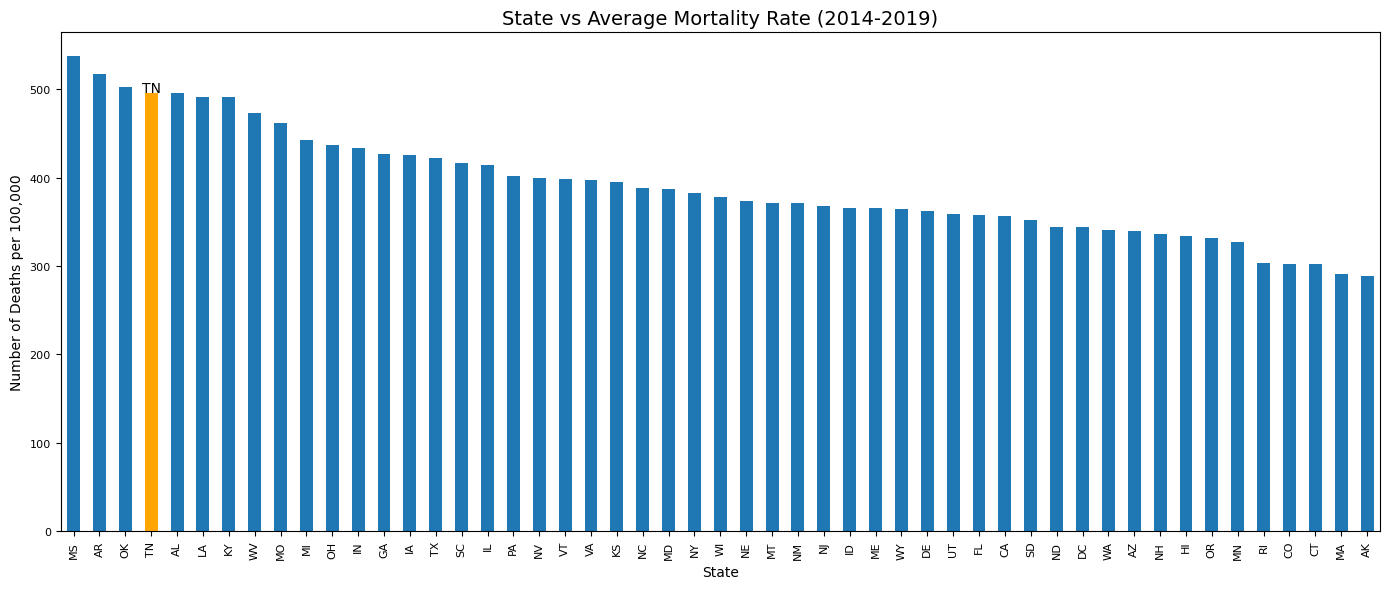

In [19]:
# Plot 1: Average MortalityRate by State
plt.figure(figsize=(14, 6))

# Calculate average mortality rate by state
avg_mortality_rate = heart.groupby('State')['MortalityRate'].mean().sort_values(ascending=False)

# Get Matplotlib's default color (first in the color cycle)
default_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

# Set color: highlight 'TN' and keep others gray
bar_colors = ['orange' if state == 'TN' else default_color for state in avg_mortality_rate.index]

# Plot the bar chart
avg_mortality_rate.plot.bar(color=bar_colors, fontsize=8)

# Add labels and title
plt.title("State vs Average Mortality Rate (2014-2019)", fontsize=14)
plt.ylabel('Number of Deaths per 100,000')
plt.xlabel('State')

# Optionally annotate TN
tn_value = avg_mortality_rate['TN']
plt.text(avg_mortality_rate.index.get_loc('TN'), tn_value + 1, 'TN', ha='center', color='black')

plt.tight_layout()
plt.show()

- I see our State(TN) as one of the top 5 highest Mortality Rate

## Top 5 States Mortality Rate

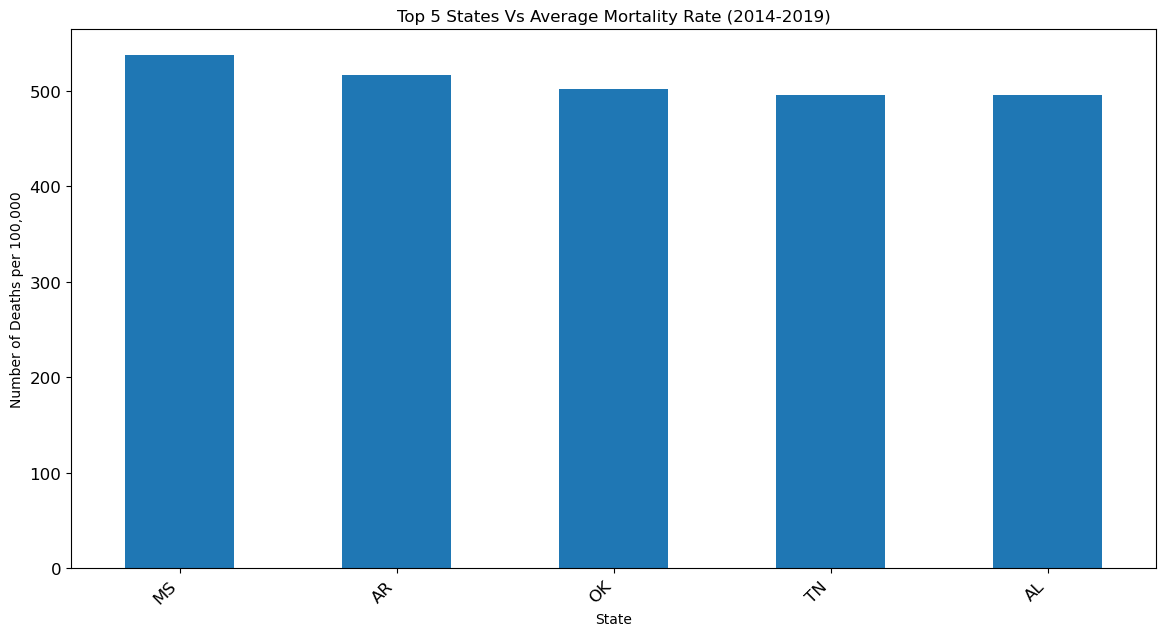

In [20]:
# Plot Average MortalityRate by Counties (Top 5 States)
plt.figure(figsize=(14,7))
top_counties = heart.groupby('State')['MortalityRate'].mean().sort_values(ascending=False).head(5)
top_counties.plot.bar(fontsize=12).set_title("Top 5 States Vs Average Mortality Rate (2014-2019)")
plt.ylabel('Number of Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

## Bottom 5 States Mortality Rate

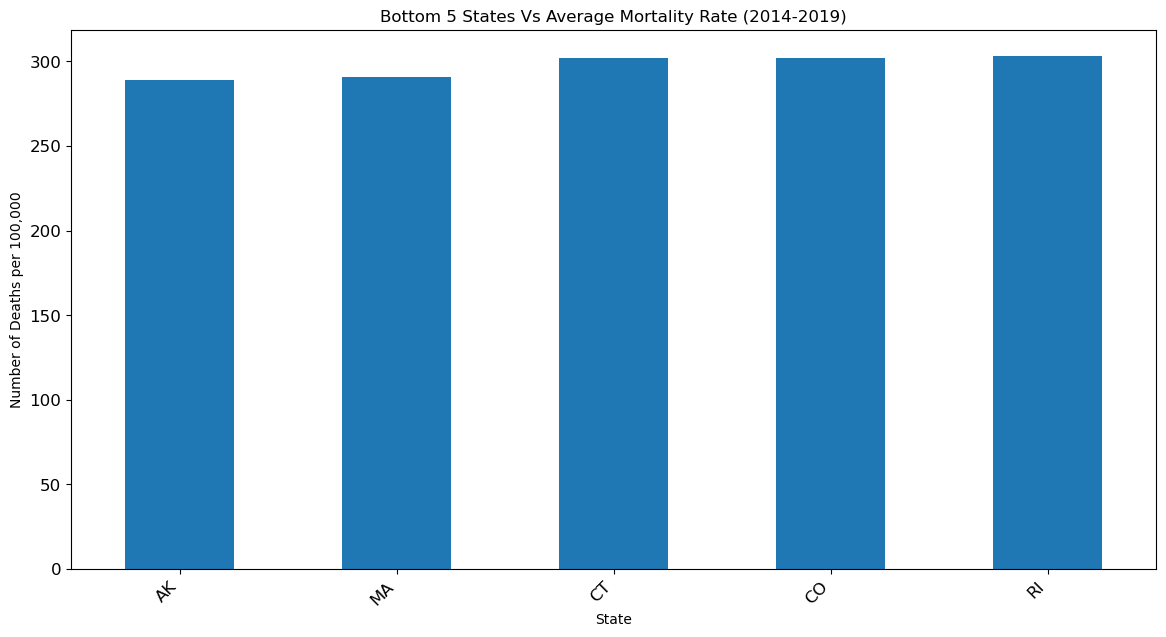

In [21]:
# Plot Average MortalityRate by Counties (Bottom 5 States)
plt.figure(figsize=(14,7))
bottom_counties = heart.groupby('State')['MortalityRate'].mean().sort_values(ascending=True).head(5)
bottom_counties.plot.bar(fontsize=12).set_title("Bottom 5 States Vs Average Mortality Rate (2014-2019)")
plt.ylabel('Number of Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top 5 Counties Mortality Rate

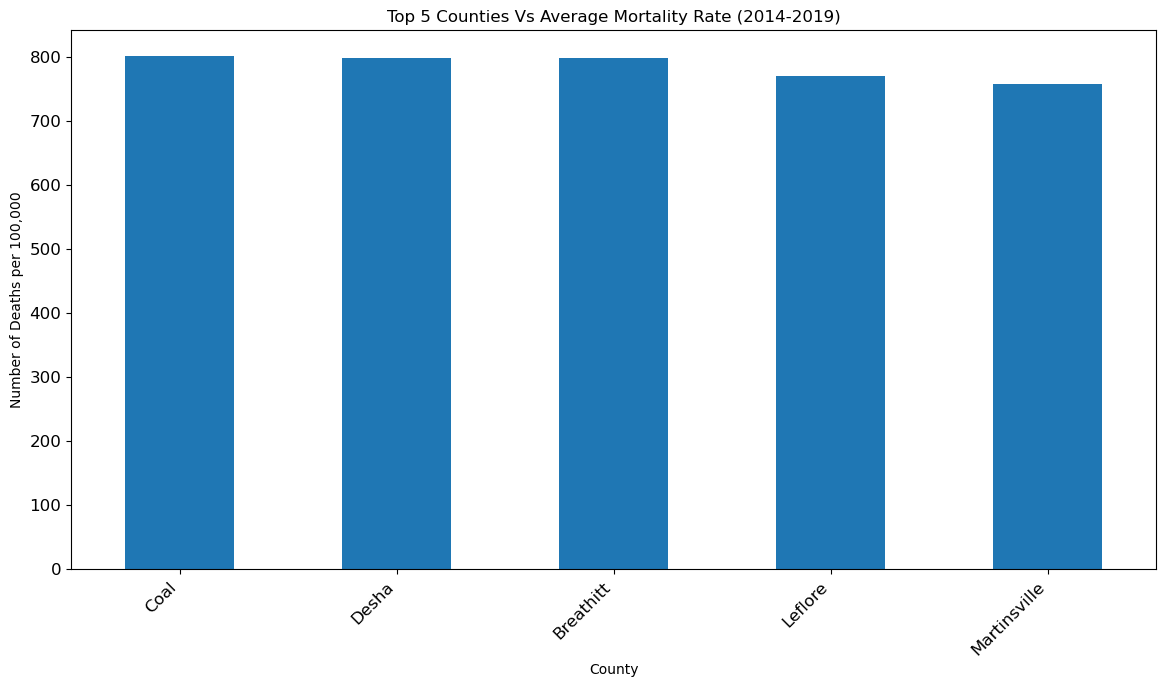

In [22]:
# Plot Average MortalityRate by Counties (Top 5 States)
plt.figure(figsize=(14,7))
top_counties = heart.groupby('County')['MortalityRate'].mean().sort_values(ascending=False).head(5)
top_counties.plot.bar(fontsize=12).set_title("Top 5 Counties Vs Average Mortality Rate (2014-2019)")
plt.ylabel('Number of Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

## Bottom 5 Counties Mortality Rate

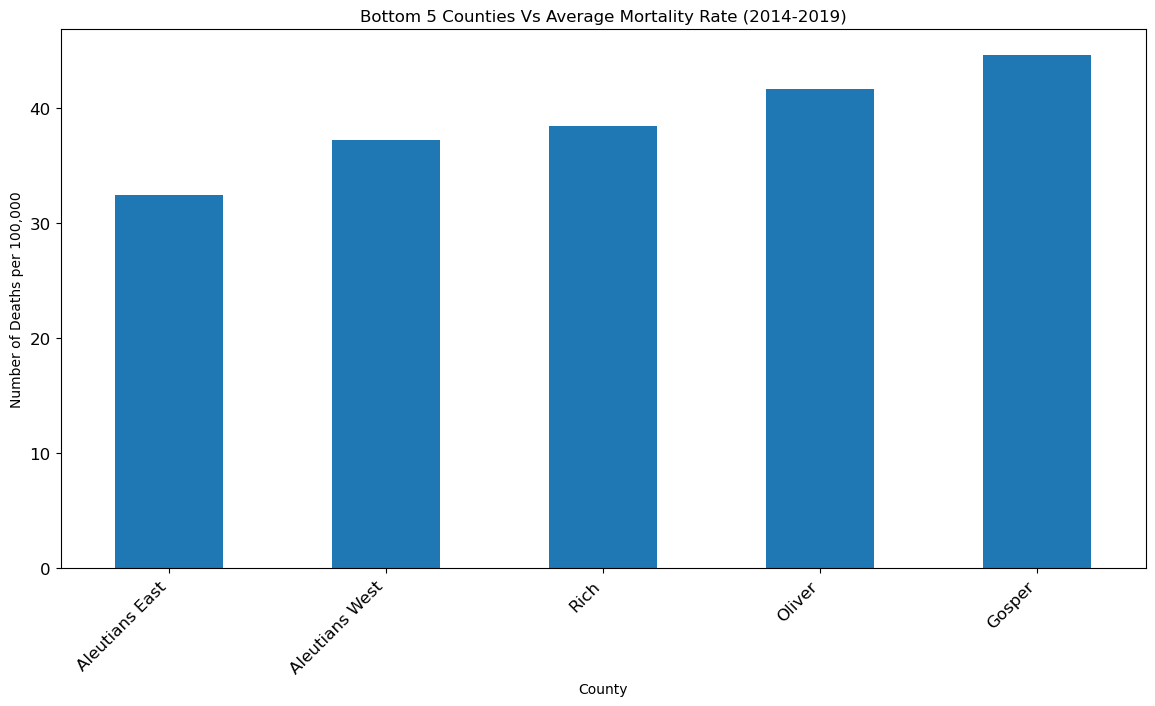

In [23]:
# Plot Average MortalityRate by Counties (Bottom 5 States)
plt.figure(figsize=(14,7))
bottom_counties = heart.groupby('County')['MortalityRate'].mean().sort_values(ascending=True).head(5)
bottom_counties.plot.bar(fontsize=12).set_title("Bottom 5 Counties Vs Average Mortality Rate (2014-2019)")
plt.ylabel('Number of Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.show()

## Heart Disease by Gender and Density

Text(0.5, 0, 'Heart Disease Mortality')

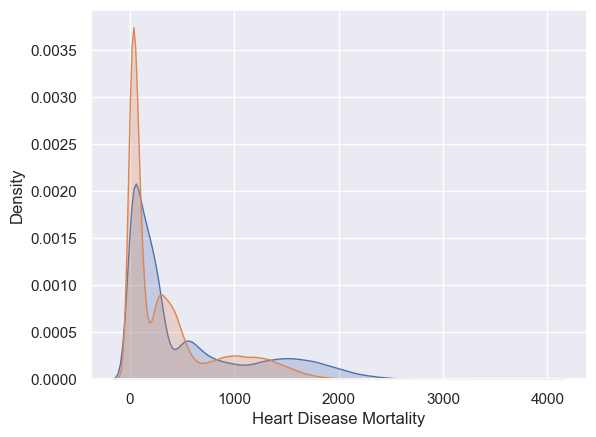

In [24]:
sns.set(color_codes=True)
sns.kdeplot(heart.MortalityRate[heart.Gender =='Men'], label ='men', shade = True)
sns.kdeplot(heart.MortalityRate[heart.Gender =='Women'], label ='women', shade = True)
plt.xlabel('Heart Disease Mortality')